# Test python for balanced dgp

In [1]:
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt

from utils import BalanceTable

## Data



In [2]:
# load data from csv
dgp_name = "balanced"

df_train = pd.read_csv(f"../dgps/data/{dgp_name}_train.csv")
df_test = pd.read_csv(f"../dgps/data/{dgp_name}_test.csv")

print(f"percentage of treated in train set: {df_train['D'].mean()}")
print(f"percentage of treated in test set: {df_test['D'].mean()}")

df_train.head()

percentage of treated in train set: 0.4458
percentage of treated in test set: 0.4388


,X1,X2,X3,D,Y,m_oracle,m_hat,m_calibrated,m_oracle_ate_weights,m_oracle_att_weights,m_hat_ate_weights,m_hat_att_weights,m_calibrated_ate_weights,m_calibrated_att_weights
0,1.372271,0.595549,0,1,5.728639,0.895575,0.885757,0.846847,1.116601,1.000000,1.128977,1.000000,1.180851,1.000000
1,0.462103,0.755682,0,0,1.338655,0.542032,0.539477,0.505618,2.183558,1.183558,2.171445,1.171445,2.022727,1.022727
2,-0.960046,0.240038,1,0,2.427715,0.159744,0.176626,0.163399,1.190114,0.190114,1.214515,0.214515,1.195312,0.195312
3,-0.607569,0.934605,1,0,2.387937,0.161144,0.183256,0.194444,1.192099,0.192099,1.224373,0.224373,1.241379,0.241379
4,-0.565393,0.395288,0,0,1.465630,0.178569,0.184839,0.194444,1.217387,0.217387,1.226752,0.226752,1.241379,0.241379


## ATE

### Balance Tables

In [3]:
covs = ["X1", "X2", "X3", "Y"]

bal_table_train = BalanceTable(
    df=df_train,
    cov_cols=covs,
    treatment="D",
    weights=df_train["m_oracle_ate_weights"],
)

bal_table_test = BalanceTable(
    df=df_test,
    cov_cols=covs,
    treatment="D",
    weights=df_test["m_oracle_ate_weights"],
)

print(bal_table_train)
print(bal_table_test)

Effective Sample Size:
            Control  Treated
Unadjusted  2771.00  2229.00
Adjusted     788.48   578.84

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1  Contin.    1.165613 -0.085297
1        X2  Contin.   -0.155199  0.029716
2        X3   Binary    0.069579  0.028744
3         Y  Contin.    1.982558  0.949600
Effective Sample Size:
            Control  Treated
Unadjusted  2806.00  2194.00
Adjusted     820.21   703.21

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1  Contin.    1.245176  0.075893
1        X2  Contin.   -0.208049 -0.028651
2        X3   Binary    0.060767 -0.007644
3         Y  Contin.    1.968015  1.037806


### Love Plots

In [4]:
ate_plots_train = []
ate_plots_test = []

weights_list = ["m_oracle_ate_weights", "m_hat_ate_weights", "m_calibrated_ate_weights"]

for i, weights in enumerate(weights_list):
    bal_table_train = BalanceTable(
        df=df_train,
        cov_cols=covs,
        treatment="D",
        weights=df_train[weights],
    )

    bal_table_test = BalanceTable(
        df=df_test,
        cov_cols=covs,
        treatment="D",
        weights=df_test[weights],
    )

    print(f"Train - weights: {weights}")
    print(bal_table_train)
    print(f"Test - weights: {weights}")
    print(bal_table_test)

    p_train = bal_table_train.love_plot() + \
              p9.ggtitle(f"Train - {weights}")
    
    p_test = bal_table_test.love_plot() + \
             p9.ggtitle(f"Test - {weights}")

    ate_plots_train.append(p_train)
    ate_plots_test.append(p_test)

Train - weights: m_oracle_ate_weights
Effective Sample Size:
            Control  Treated
Unadjusted  2771.00  2229.00
Adjusted     788.48   578.84

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1  Contin.    1.165613 -0.085297
1        X2  Contin.   -0.155199  0.029716
2        X3   Binary    0.069579  0.028744
3         Y  Contin.    1.982558  0.949600
Test - weights: m_oracle_ate_weights
Effective Sample Size:
            Control  Treated
Unadjusted  2806.00  2194.00
Adjusted     820.21   703.21

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1  Contin.    1.245176  0.075893
1        X2  Contin.   -0.208049 -0.028651
2        X3   Binary    0.060767 -0.007644
3         Y  Contin.    1.968015  1.037806
Train - weights: m_hat_ate_weights
Effective Sample Size:
            Control  Treated
Unadjusted  2771.00  2229.00
Adjusted     961.78   694.04

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1  Contin.    1.186356  0.001487
1       

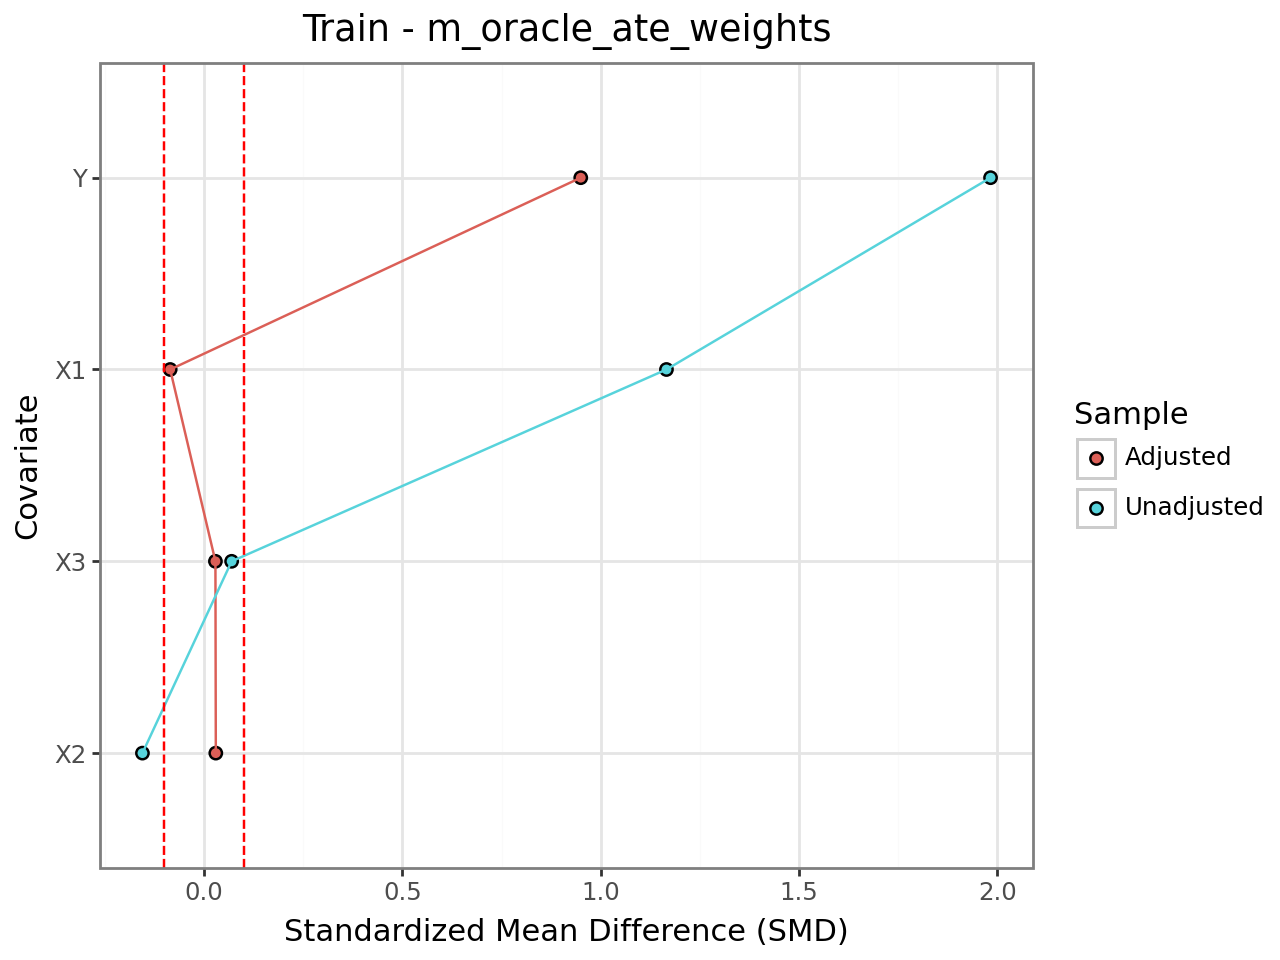

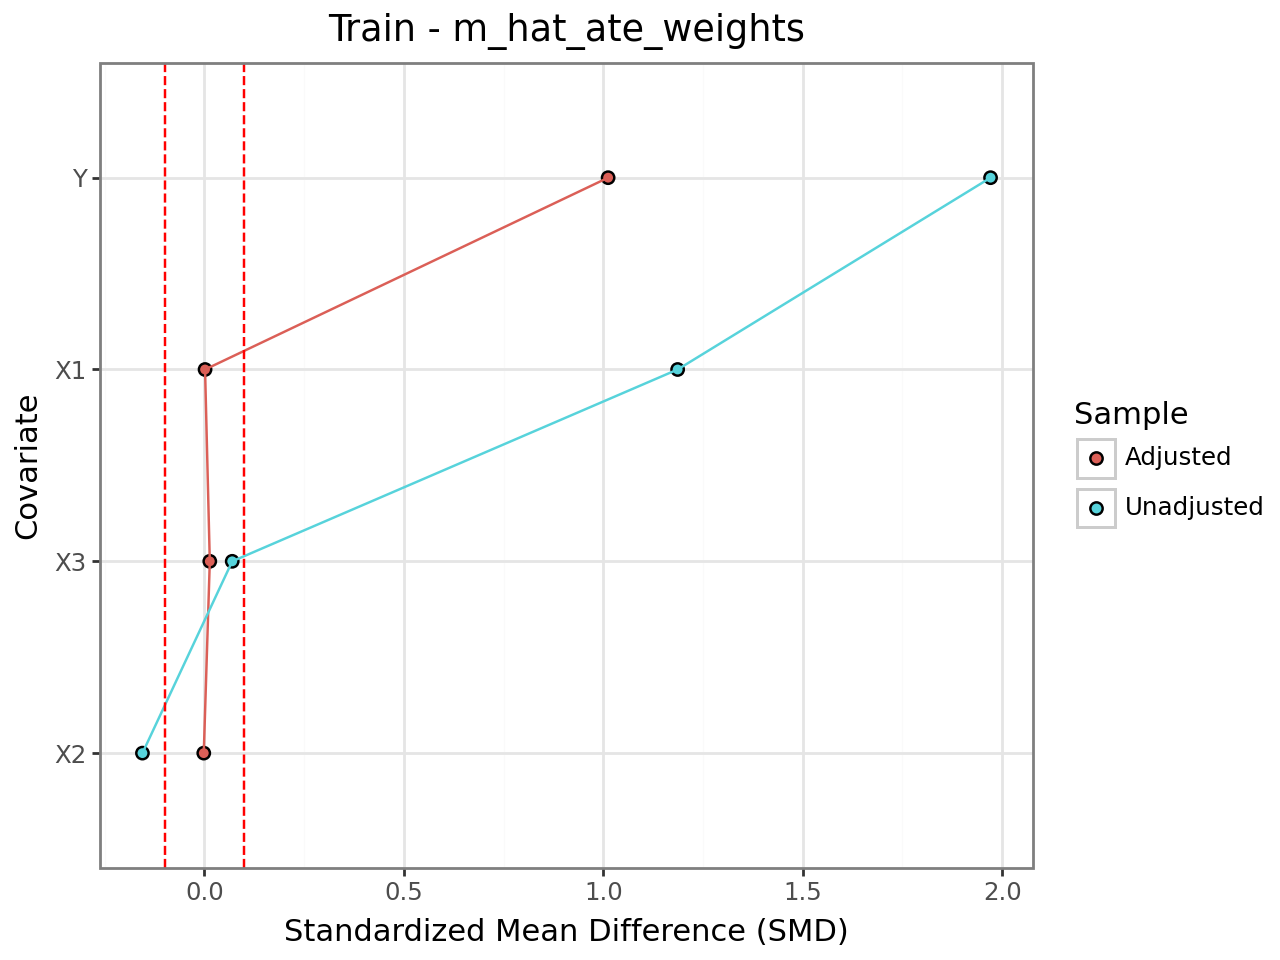

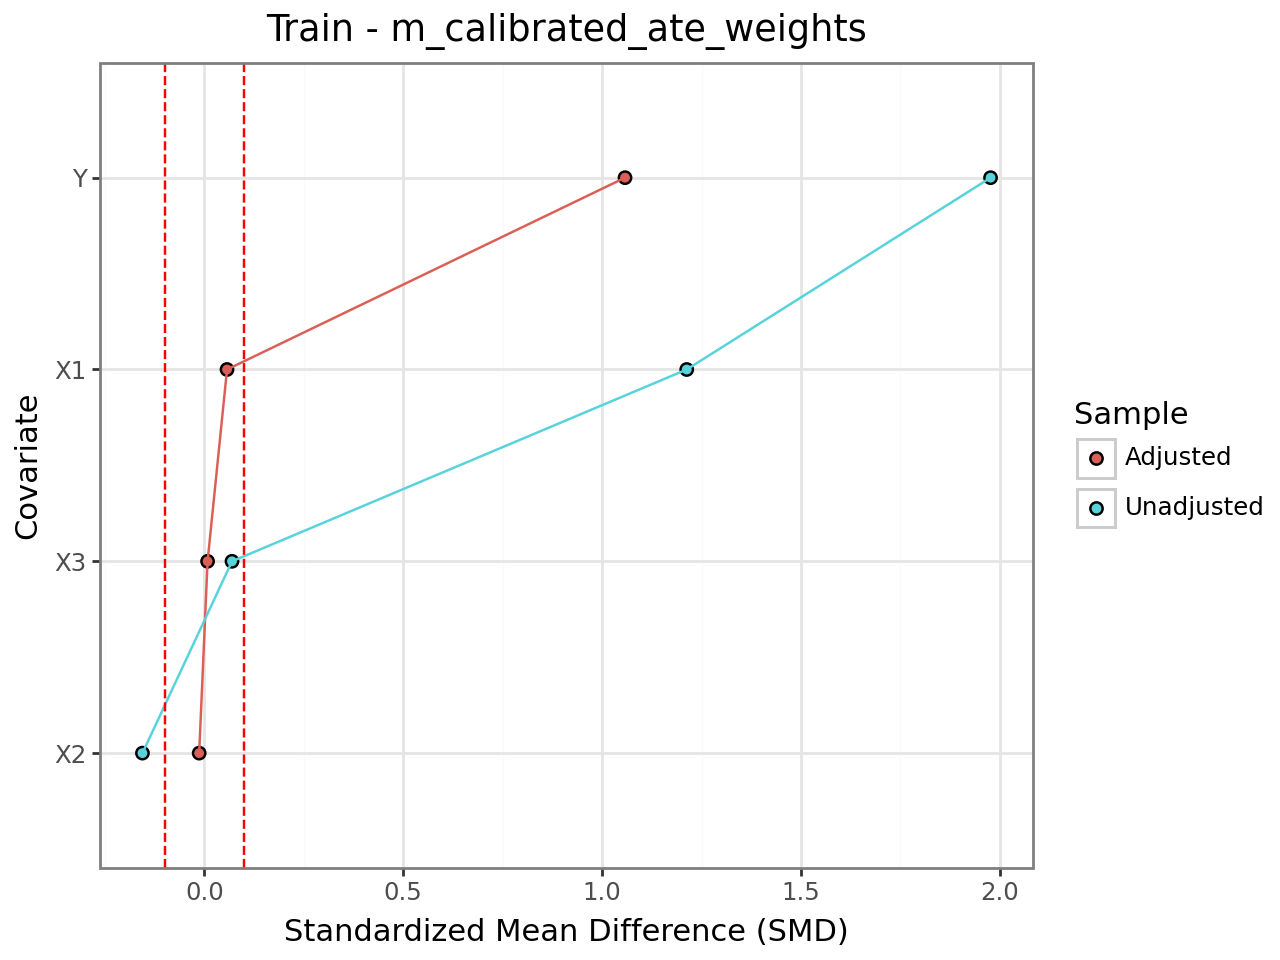

In [5]:
for i, p in enumerate(ate_plots_train):
    p.show()

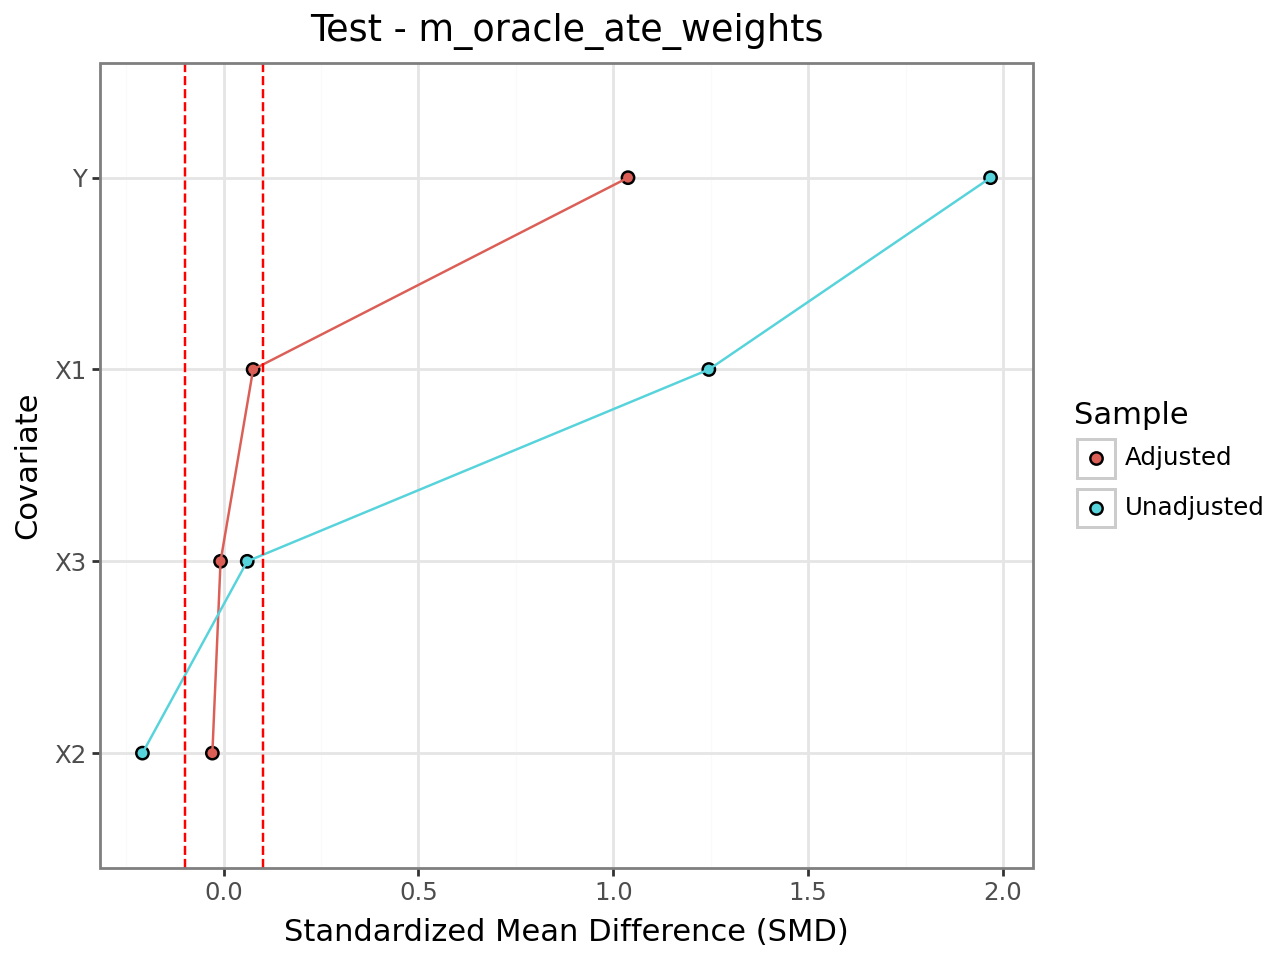

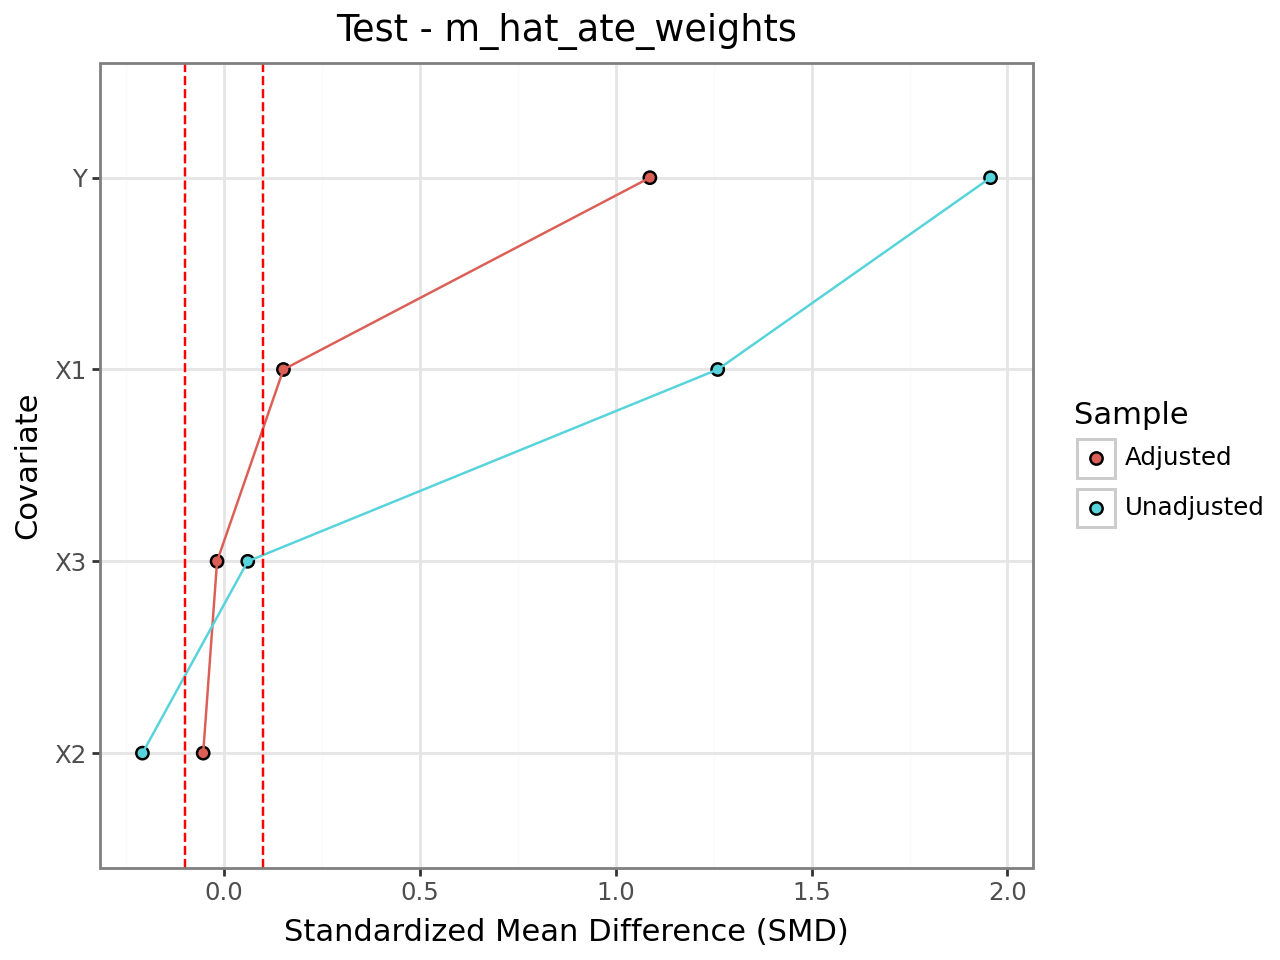

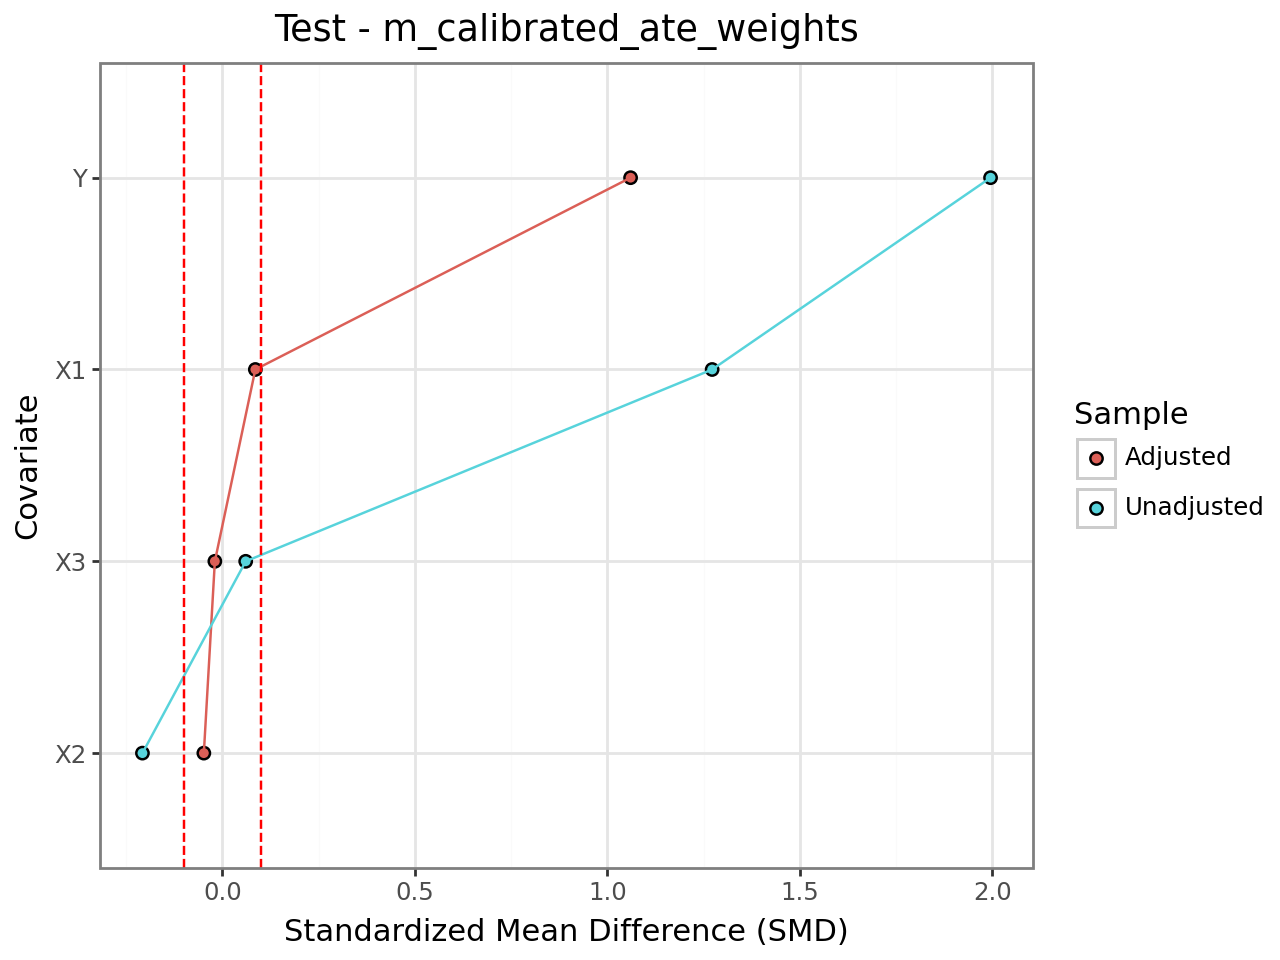

In [6]:
for i, p in enumerate(ate_plots_test):
    p.show()

## ATT

### Balance Tables

In [7]:
covs = ["X1", "X2", "X3", "Y"]

bal_table_train = BalanceTable(
    df=df_train,
    cov_cols=covs,
    treatment="D",
    weights=df_train["m_oracle_att_weights"],
)

bal_table_test = BalanceTable(
    df=df_test,
    cov_cols=covs,
    treatment="D",
    weights=df_test["m_oracle_att_weights"],
)

print(bal_table_train)
print(bal_table_test)

Effective Sample Size:
            Control  Treated
Unadjusted  2771.00   2229.0
Adjusted     215.36   2229.0

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1  Contin.    1.108158 -0.076876
1        X2  Contin.   -0.153921  0.122960
2        X3   Binary    0.069579  0.057408
3         Y  Contin.    1.895051  0.936872
Effective Sample Size:
            Control  Treated
Unadjusted  2806.00   2194.0
Adjusted     213.66   2194.0

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1  Contin.    1.166812  0.001826
1        X2  Contin.   -0.209574  0.027269
2        X3   Binary    0.060767  0.011233
3         Y  Contin.    1.855910  0.918830


### Love Plots

In [8]:
att_plots_train = []
att_plots_test = []

weights_list = ["m_oracle_att_weights", "m_hat_att_weights", "m_calibrated_att_weights"]

for i, weights in enumerate(weights_list):
    bal_table_train = BalanceTable(
        df=df_train,
        cov_cols=covs,
        treatment="D",
        weights=df_train[weights],
    )

    bal_table_test = BalanceTable(
        df=df_test,
        cov_cols=covs,
        treatment="D",
        weights=df_test[weights],
    )

    print(bal_table_train)
    print(bal_table_test)

    p_train = bal_table_train.love_plot() + \
              p9.ggtitle(f"Train - {weights}")
    
    p_test = bal_table_test.love_plot() + \
             p9.ggtitle(f"Test - {weights}")

    att_plots_train.append(p_train)
    att_plots_test.append(p_test)

Effective Sample Size:
            Control  Treated
Unadjusted  2771.00   2229.0
Adjusted     215.36   2229.0

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1  Contin.    1.108158 -0.076876
1        X2  Contin.   -0.153921  0.122960
2        X3   Binary    0.069579  0.057408
3         Y  Contin.    1.895051  0.936872
Effective Sample Size:
            Control  Treated
Unadjusted  2806.00   2194.0
Adjusted     213.66   2194.0

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1  Contin.    1.166812  0.001826
1        X2  Contin.   -0.209574  0.027269
2        X3   Binary    0.060767  0.011233
3         Y  Contin.    1.855910  0.918830
Effective Sample Size:
            Control  Treated
Unadjusted  2771.00   2229.0
Adjusted     269.29   2229.0

SMD Table:
  covariate     type  diff_unadj  diff_adj
0        X1  Contin.    1.131538 -0.020917
1        X2  Contin.   -0.154671  0.088017
2        X3   Binary    0.069579  0.039167
3         Y  Contin.    1.886515

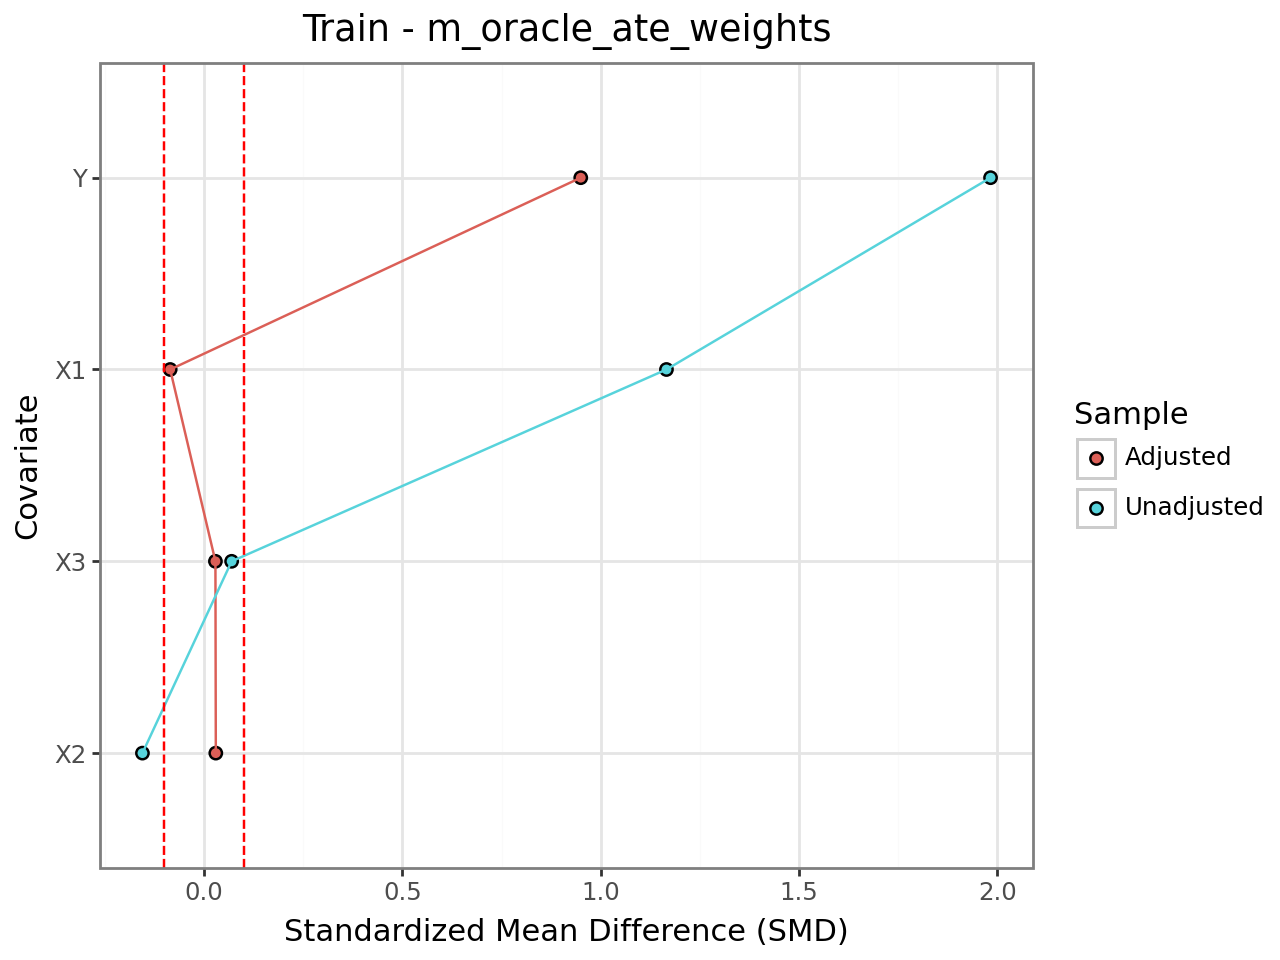

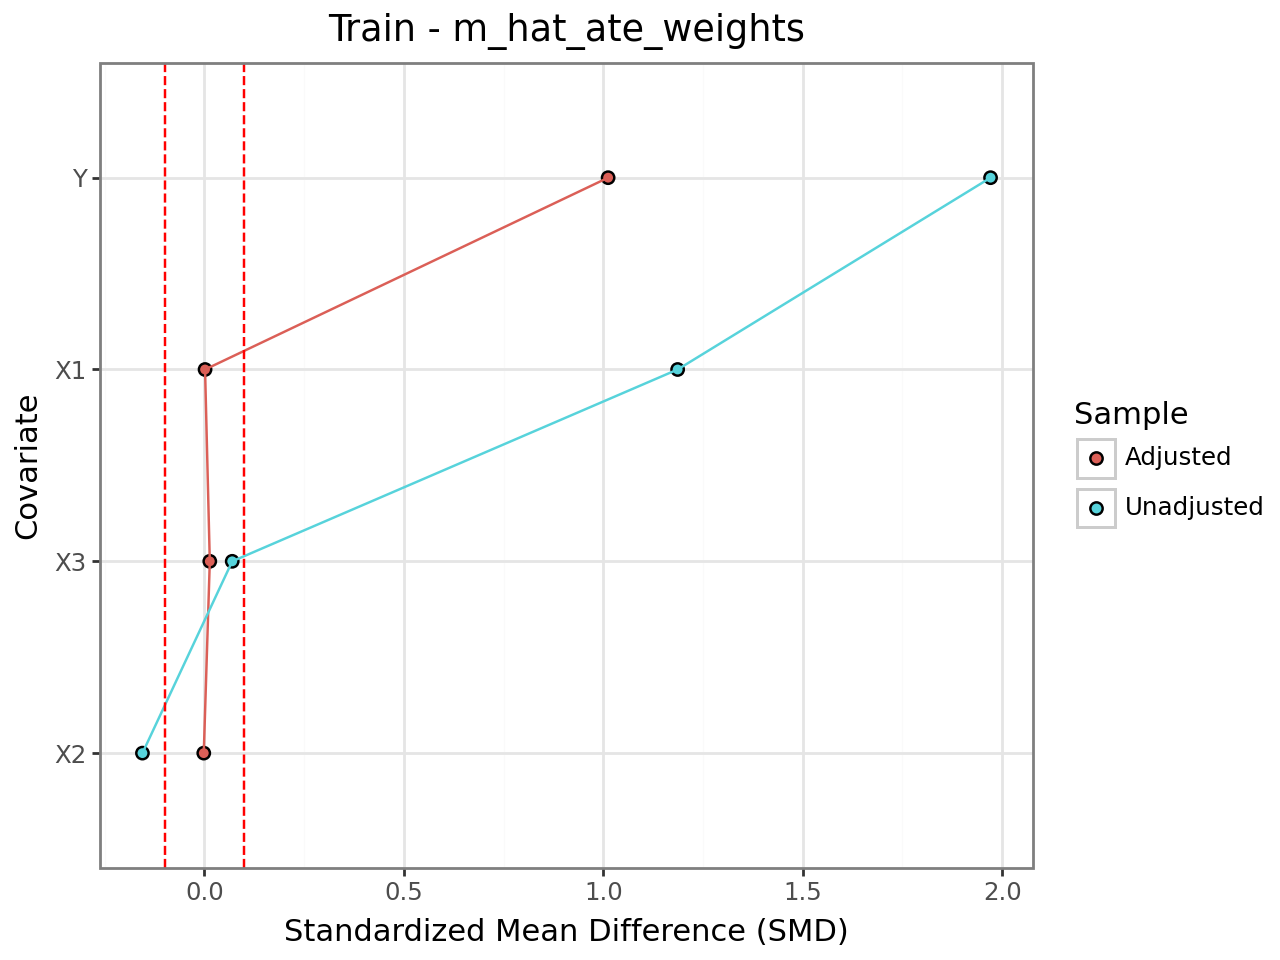

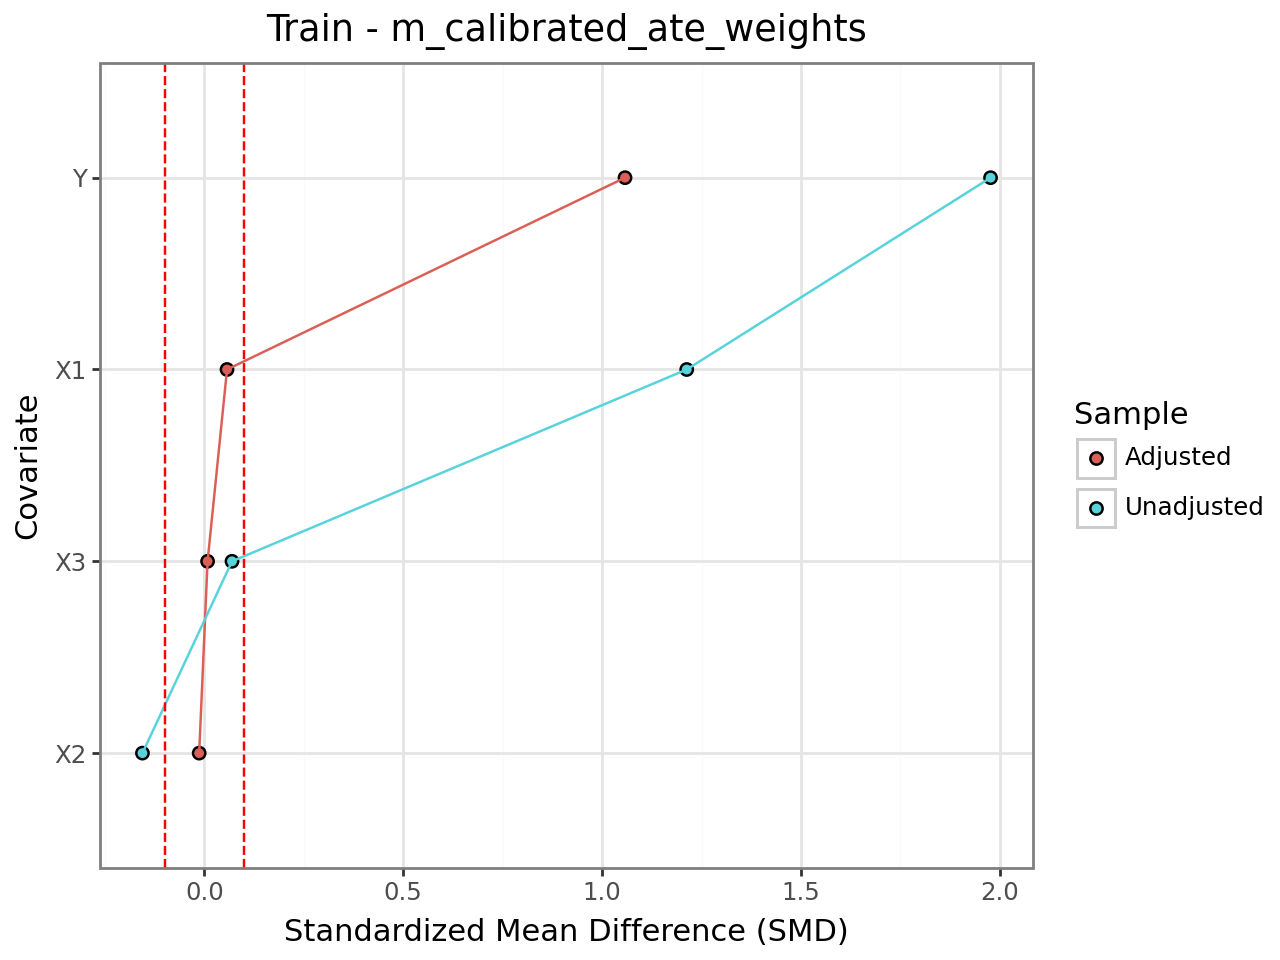

In [9]:
for i, p in enumerate(ate_plots_train):
    p.show()

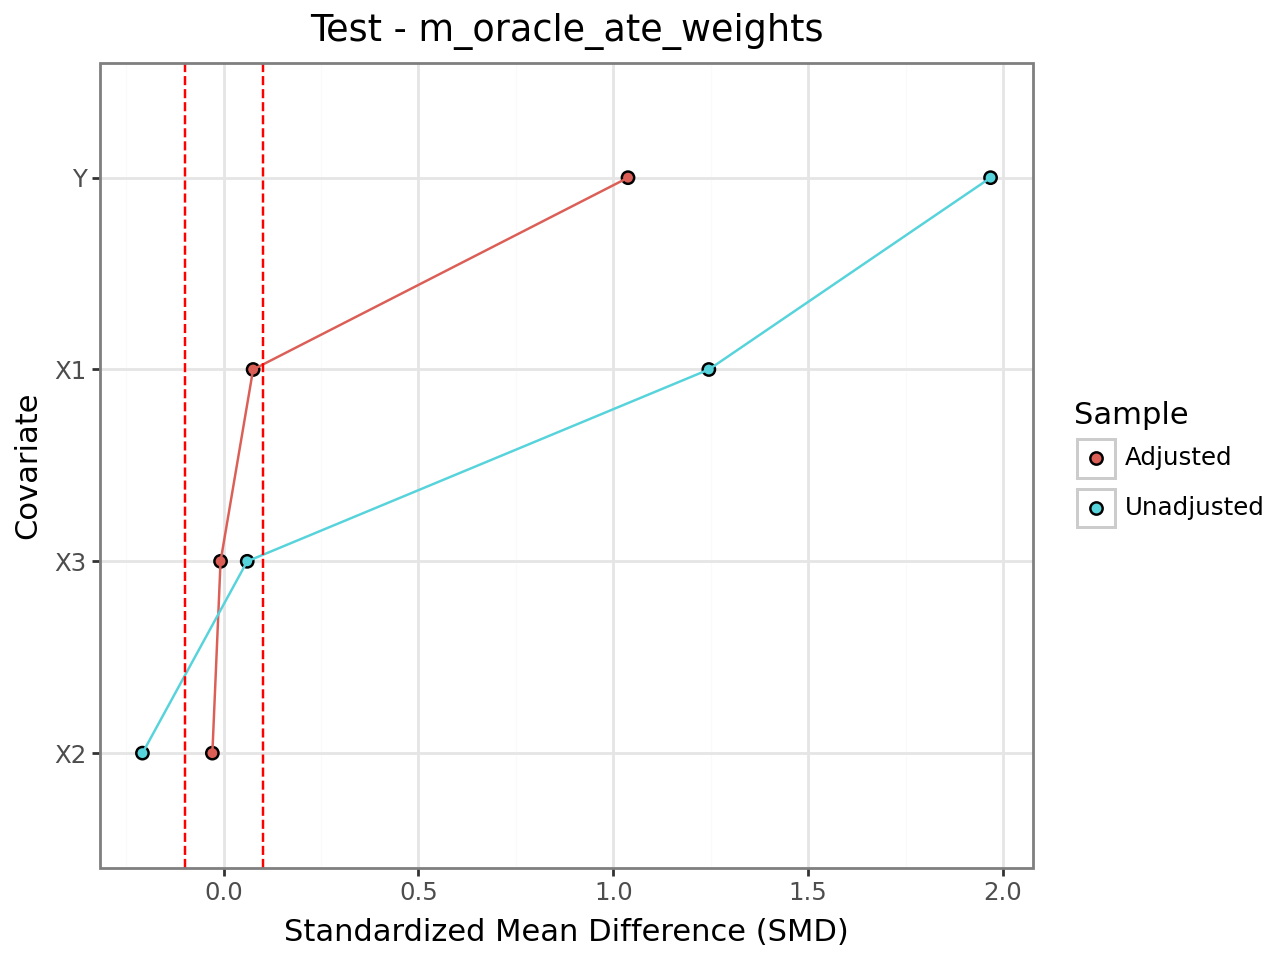

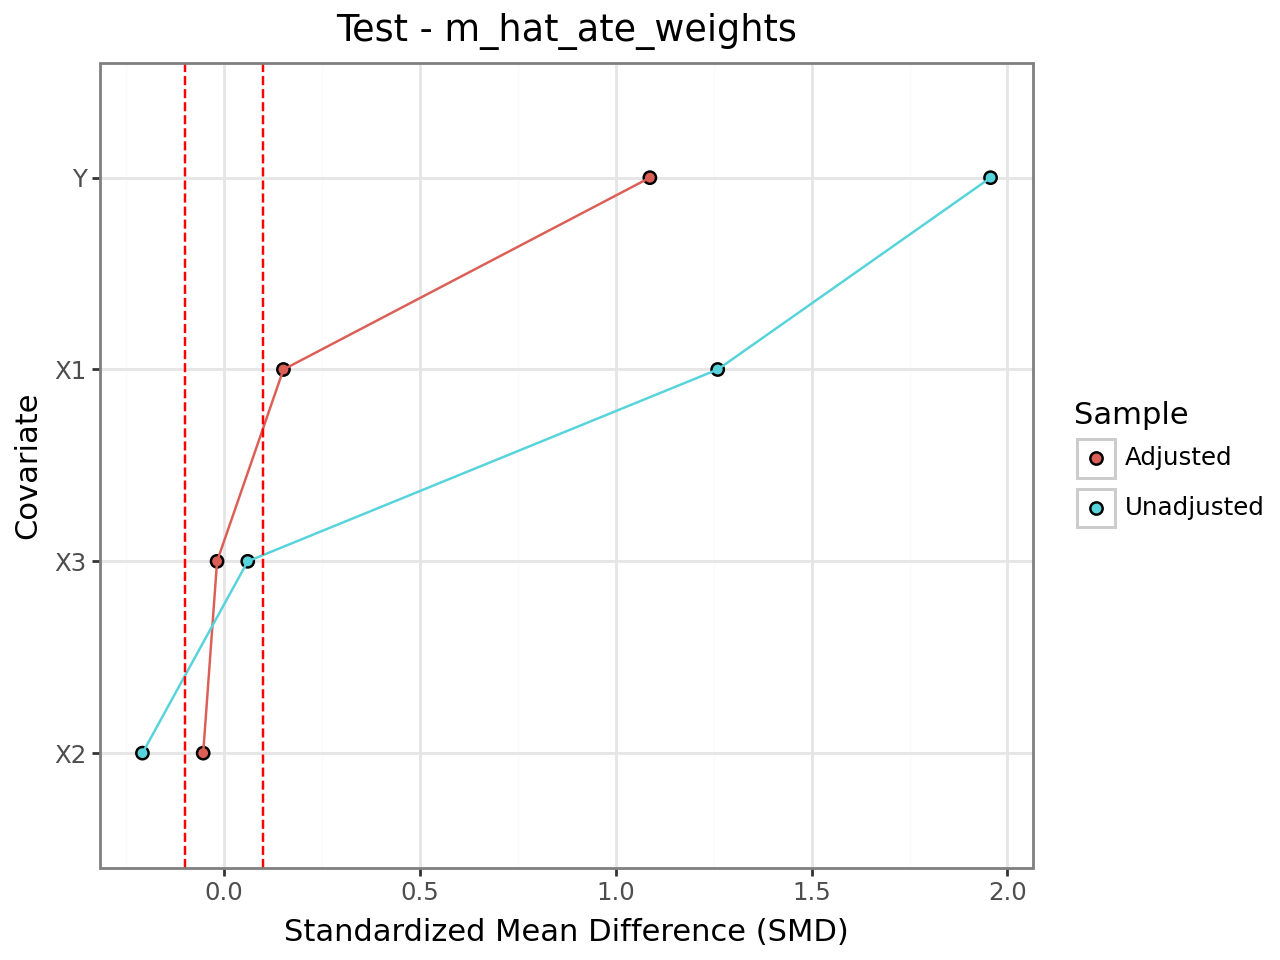

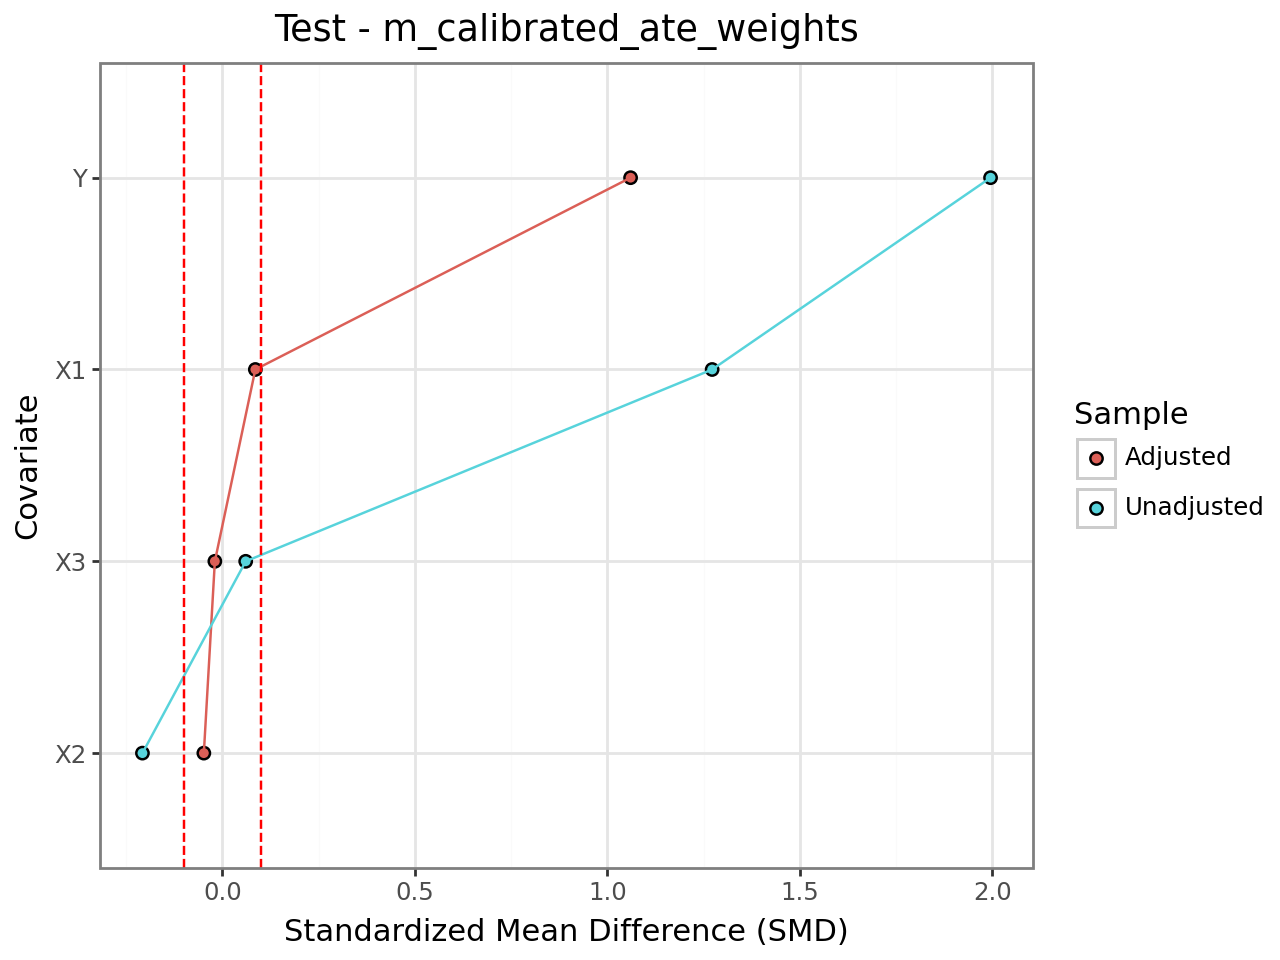

In [10]:
for i, p in enumerate(ate_plots_test):
    p.show()

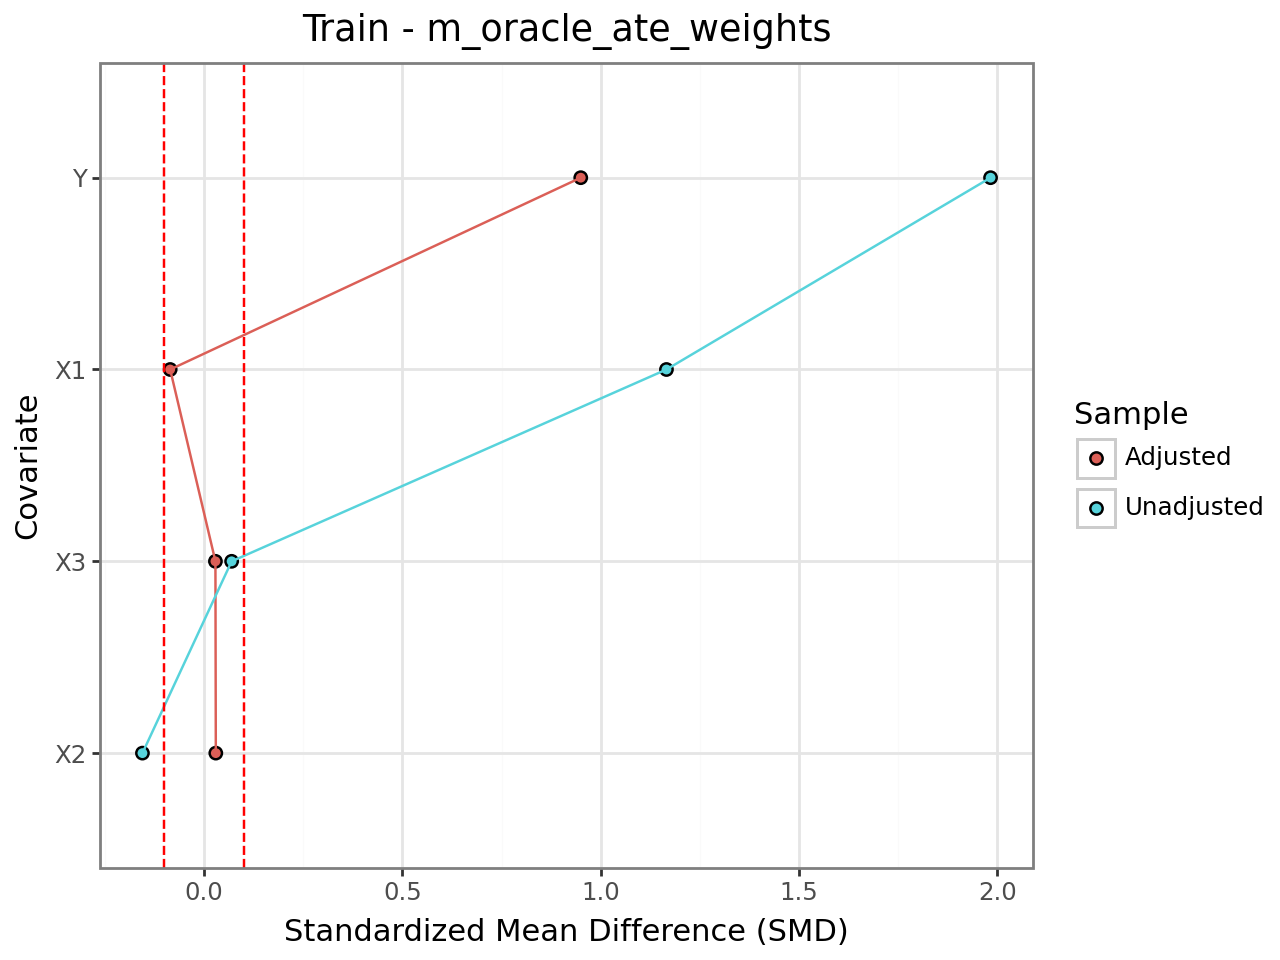

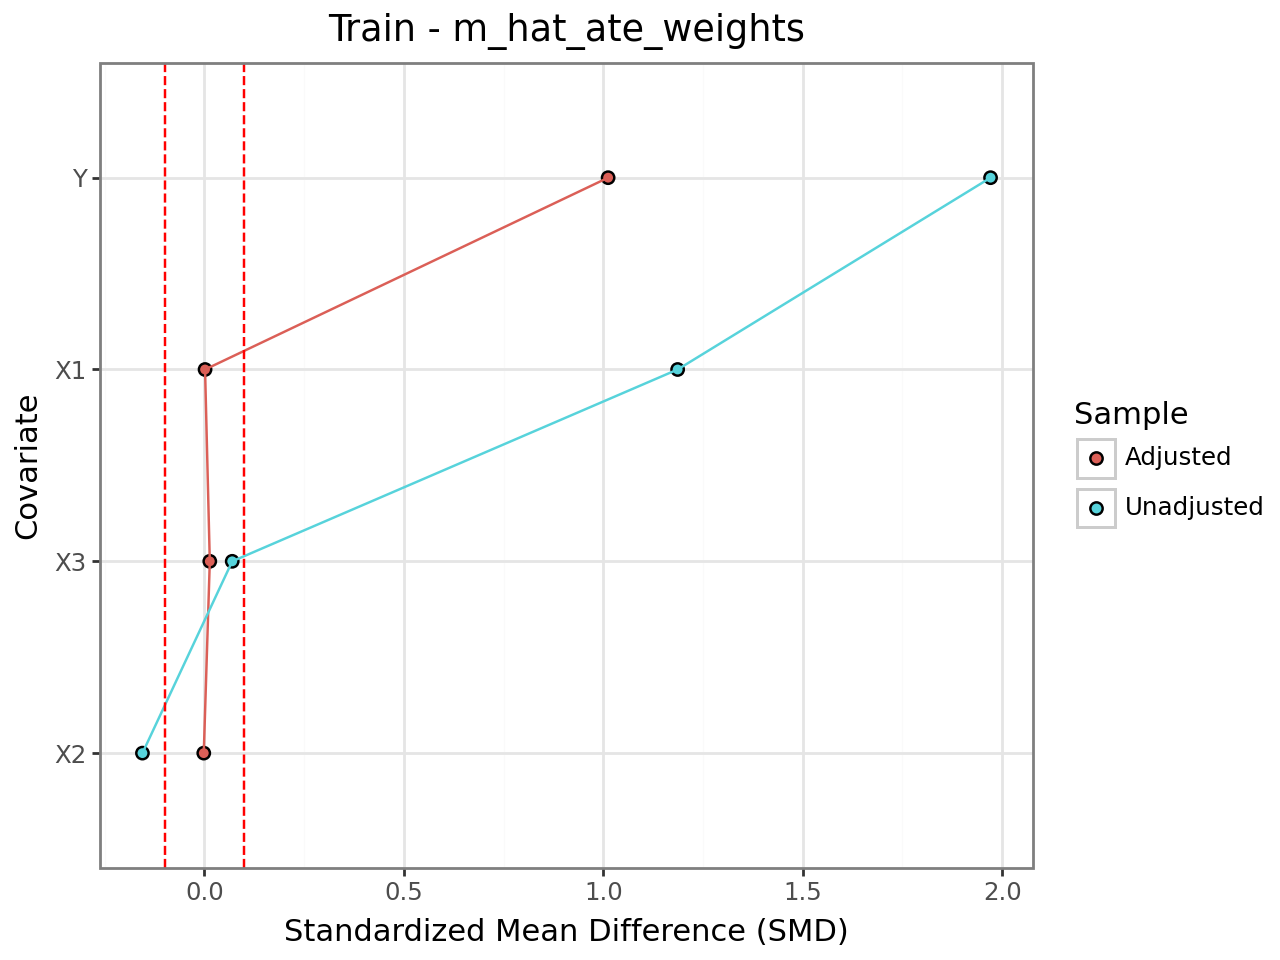

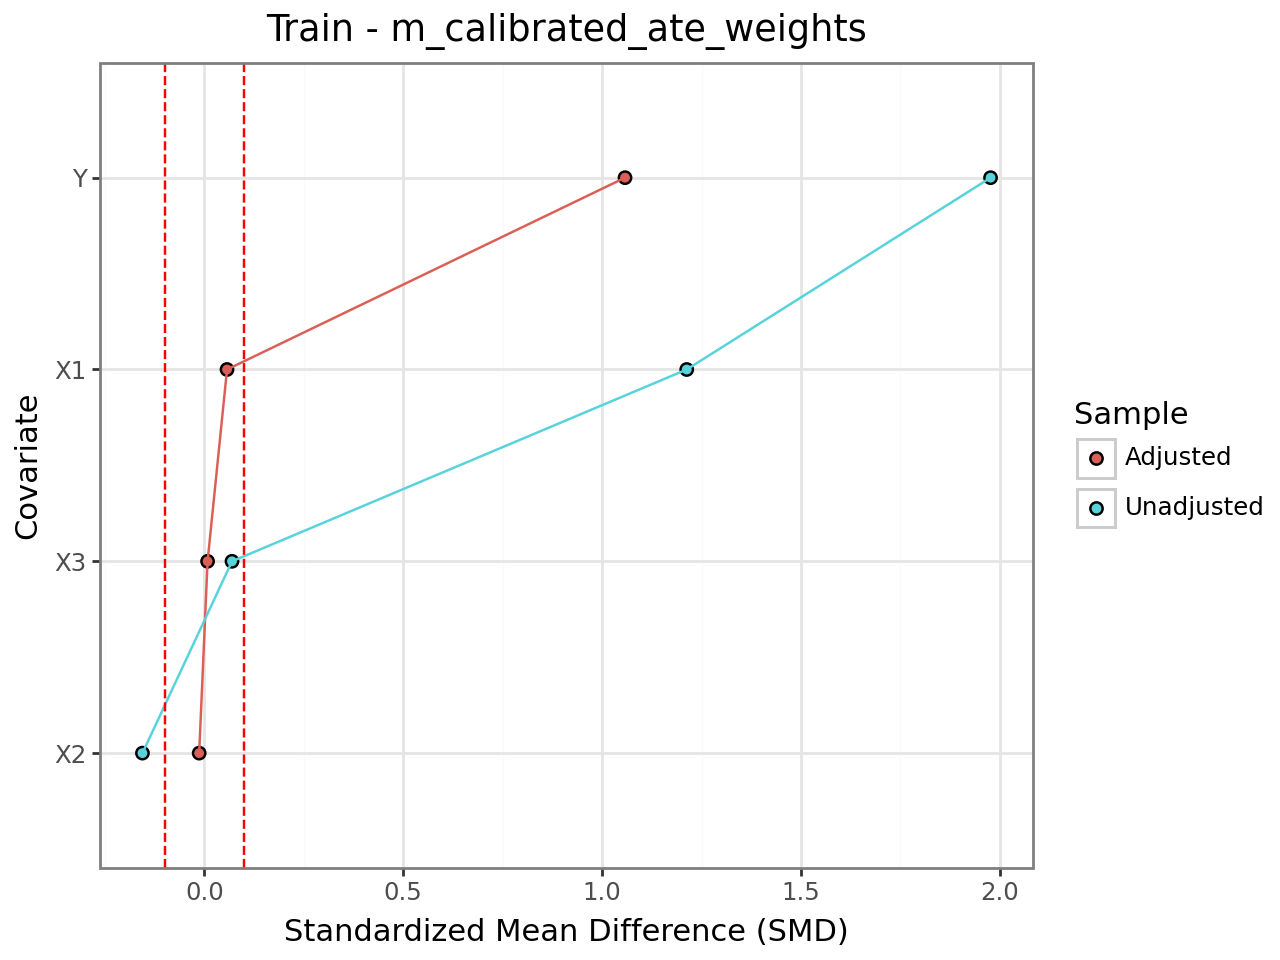

In [11]:
for i, p in enumerate(ate_plots_train):
    p.show()

## Additional Balance plots

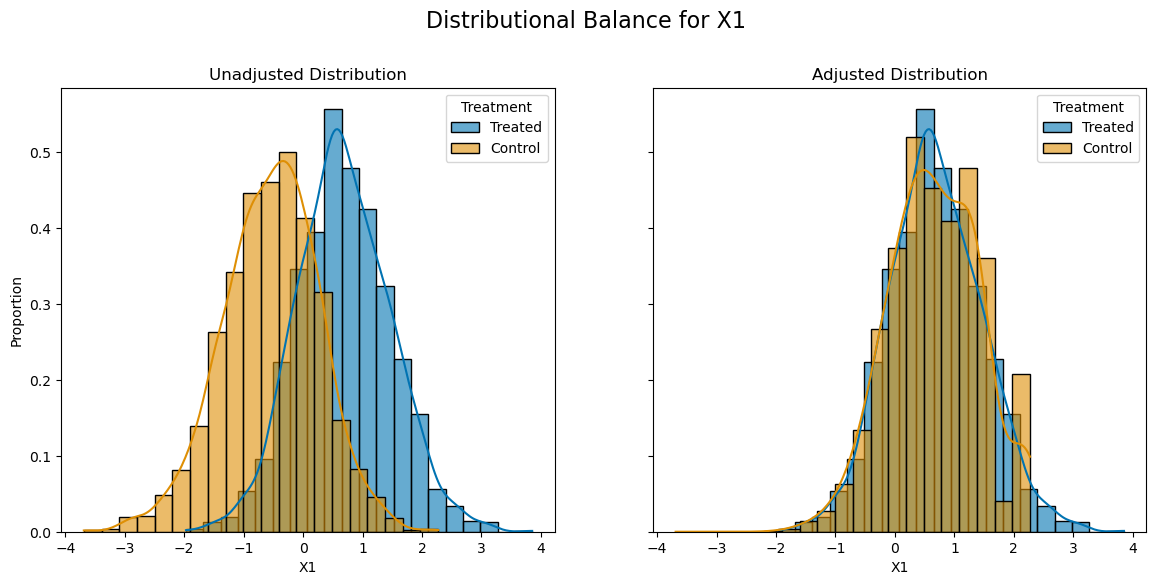

In [12]:
g = bal_table_test.balance_plot(covariate="X1")
plt.show()

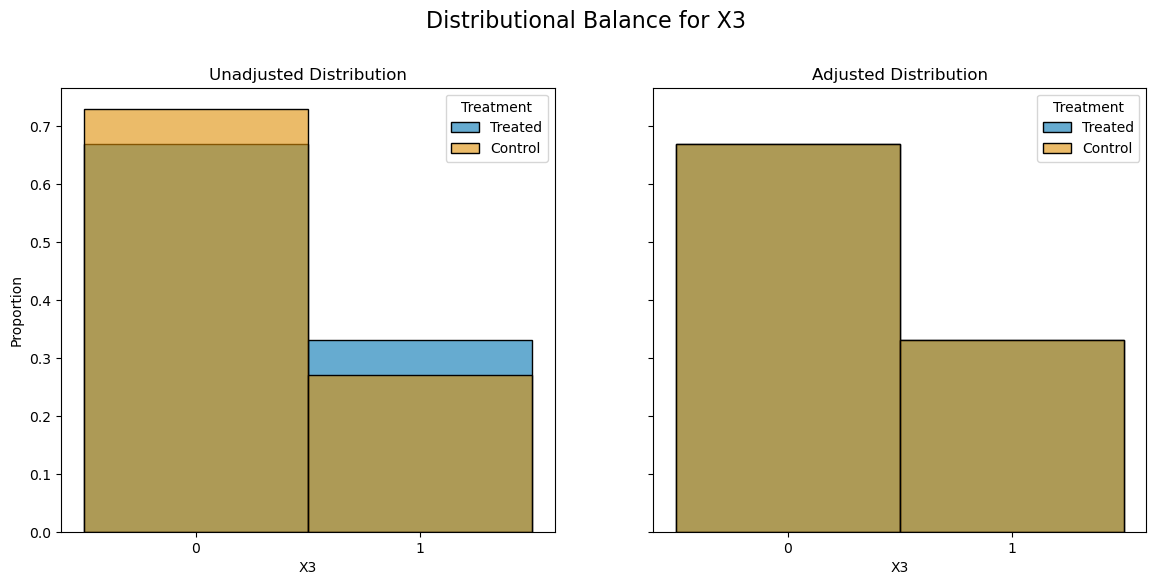

In [13]:
g = bal_table_test.balance_plot(covariate="X3")
plt.show()